<a href="https://colab.research.google.com/github/SadeenAlsabbagh/Computational_Physics/blob/main/Sadeen_Alsabbagh_In_Class_1D_Projectiles_with_Drag_Up_and_Down.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Solving Differential Equations by Numerical Integration

## Newtonian Mechanics

Starting in Physics 101 when you learned the differential equation $F=ma$, you've been solving a differential equation, Newton's 2nd Law, to find position and velocity as a function of time.  



### Equations of Kinematics

For example, recall the equations of kinematics, which were differential equations and their solutions for constant acceleration, e.g.
\begin{eqnarray}
\frac{dv}{dt}&=&a \\
dv&=&a dt \\
\int dv&=&\int a dt\\
v&=&a t+ v_o
\end{eqnarray}
and
\begin{eqnarray}
\frac{dx}{dt}&=&v \\
dx&=&v dt \\
\int dx&=&\int v dt\\
\int dx&=&\int a t+ v_o dt\\
x&=& \frac{1}{2}a t^2+ v_o t + x_o.
\end{eqnarray}
Notice that we use the boundary conditions ($x(0)=x_o$ and $v(0)=v_o$) to determine the constants of integration.



### Other Equations with Analytical Solutions: SHO and Drag on a Falling Object
Even when the acceleration is not constant, we can solve many Newton's 2nd Law diff eqs analytically.  Recall the simple harmonic oscillator:
\begin{eqnarray}
F&=&-kx \\
ma & = & -kx \\
m \frac{dx^2 }{dt^2} &=&-kx \\
\frac{dx^2}{dt^2} &=&-\frac{k}{m}x
\end{eqnarray}
which you know has solutions of the form
$x=A \cos\left(\sqrt{\frac{k}{m}}t+\phi\right)$,
and we use boundary conditions to determine $A$ and $\phi$.

Consider an object dropped near the Earth's surface that experiences quadratic drag, with its magnitude given by $F_D=c v^2$.
\begin{eqnarray}
F & = & m a \\
-mg+cv^2&=&m a
\end{eqnarray}
This equation can be solved analytically if we use $a=\frac{d v}{dt}$.
\begin{eqnarray}
F & = & m a \\
-mg+c v_y^2&=& m \frac{d v}{dt}.
\end{eqnarray}
We can separate variables and, again, integrate.

**Do this one yourself!**
\begin{eqnarray}
(-mg+c v^2){dt}&=&m d v\\
{dt}&=&m \frac{d v}{-mg+c v^2}\\
{dt}&=& \frac{d v}{-g+\frac{c}{m} v^2}\\
\int{dt}&=& \int \frac{d v}{\frac{c}{m} v^2 -g}\\
t+C&=&-\frac{\tanh^{-1}\left(\sqrt{\frac{c}{mg}}v\right)}{\sqrt{\frac{cg}{m}}}\\
t+C&=&-\frac{\tanh^{-1}\left(\sqrt{\frac{c}{mg}}v\right)}{g\sqrt{\frac{c}{mg}}}\\
\end{eqnarray}

When the object reaches terminal speed,
\begin{eqnarray}
-mg + c v^2&=&0\\
 c v^2&=&mg \\
  v^2&=&\frac{mg}{c} \\
    v_T&=&\sqrt{\frac{mg}{c} }\\
\end{eqnarray}
and substituting this in:
\begin{eqnarray}
t+C&=&-\frac{v_T}{g}\tanh^{-1}\left(\frac{v}{v_T}\right)\\
gt+C&=&-v_T\tanh^{-1}\left(\frac{v}{v_T}\right)\\
-\frac{gt+C}{v_T}&=&\tanh^{-1}\left(\frac{v}{v_T}\right)\\
-\tanh\left(\frac{gt+C}{v_T}\right)&=&\frac{v}{v_T}\\
v&=&-v_T\tanh\left(\frac{gt+C}{v_T}\right)\\
\end{eqnarray}
At t=0, v=0 because the object is dropped.  This means C=0, and
\begin{eqnarray}
v&=&-v_T\tanh\left(\frac{gt}{v_T}\right)\\
\end{eqnarray}

# Set all constants here

In [ ]:
g=9.81
m=1.0
c=0.2
vT=np.sqrt(m*g/c)

# 1D Motion with Quadratic Drag: Plotting Analytical Solutions


## An Object Dropped from Rest


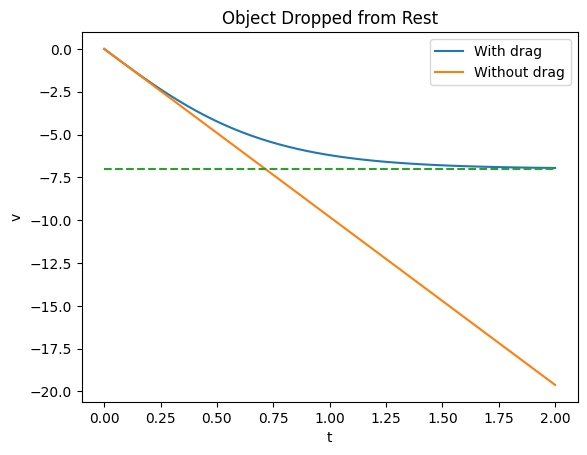

In [ ]:
def v_down(time,g,vT):
  return -vT*np.tanh(g*time/vT)

t=np.linspace(0,2)
v=v_down(t,g,vT)
plt.plot(t,v,label='With drag')
plt.plot(t,-g*t,label='Without drag')
plt.plot(t,-vT*np.ones_like(t),'--')

plt.annotate('$v_T$', xy=(-.3, -vT), xytext=(-.4, -vT))
plt.title('Object Dropped from Rest')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.show()

Notice that the velocity of the object asymptotes to $v_T$.

## An Object Moving Upward

But what if the object is thrown upward?  In that case, we need to change the sign of the direction of the drag force, and treat it as a separate case.
\begin{eqnarray}
F & = & m a_y \\
-mg-c v^2&=&m \frac{d v}{dt}\\
dt&=&m \frac{d v}{-mg-c v^2}\\
dt&=& -\frac{d v}{g+\frac{c}{m} v^2}\\
-gdt&=& \frac{d v}{1+\frac{c}{mg} v^2}
\end{eqnarray}
Even though an upward-moving object does not have a terminal speed, we can reuse $v_T=\frac{mg}{c}$ from the dropped object case to make our expression a little simpler:
\begin{eqnarray}
\int -g dt &=& \frac{d v}{1+ \left(\frac{v}{v_T}\right)^2}\\
-g t  + C&=&  \frac{\tan^{-1}\left(\frac{v}{v_T}\right)}{\frac{1}{v_T}}\\
\frac{C-gt}{v_T} &=&  \tan^{-1}\left(\frac{v}{v_T}\right)\\
\tan\left(\frac{C-gt}{v_T}\right) &=&  \frac{v}{v_T}\\
v&=&v_T\tan\left(\frac{C-gt}{v_T}\right)
\end{eqnarray}
Let $v(0)=v_o$.
\begin{eqnarray}
v_o&=&v_T\tan\left(\frac{C-0}{v_T}\right)\\
\frac{v_o}{v_T}&=&\tan\left(\frac{C}{v_T}\right) \\
\tan^{-1}\left(\frac{v_o}{v_T}\right)&=&\frac{C}{v_T}\\
C&=&v_T\tan^{-1}\left(\frac{v_o}{v_T}\right)
\end{eqnarray}
Plugging this in,
\begin{eqnarray}
v&=&v_T\tan\left(\frac{v_T\tan^{-1}\left(\frac{v_o}{v_T}\right)-gt}{v_T}\right)
&=&v_T\tan\left[\tan^{-1}\left(\frac{v_o}{v_T}\right)-\frac{gt}{v_T}\right]
\end{eqnarray}

This equation is plotted below.  **Stress test it** and figure out the limitations of this analytical solution!  In particular, consider:

*   Which parameter controls the strength of the drag force? Try different values.
*   Compare this result to the case without drag. (You'll need to add this to the plot.)
*   Over what range of times and velocities is this solution valid?





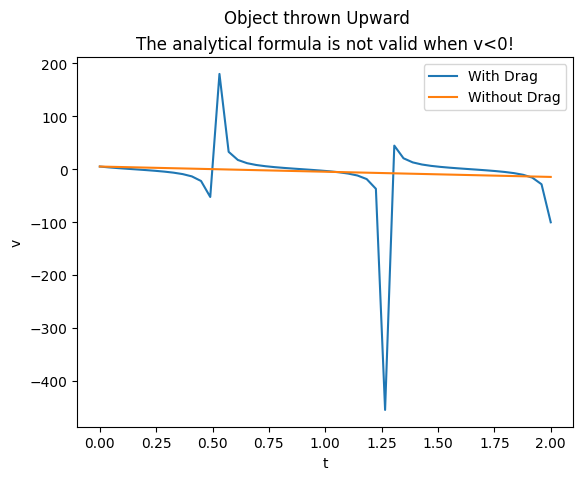

In [ ]:
time=np.linspace(0,6)
v0=5.

def v_up(time,vT,v0):
  return vT*np.tan(np.arctan(v0/vT)-time*9.81/vT)

plt.subplot()
plt.plot(t, v_up(time,vT,v0),label='With Drag')
plt.plot(t, v0-g*t,label='Without Drag')
plt.suptitle('Object thrown Upward')
plt.title('The analytical formula is not valid when v<0!')
plt.ylabel('v')
plt.xlabel('t')
plt.legend()

plt.show()

Obviously our solution for an object moving *upward* is not valid when $v<0$, i.e., when the object is moving *downward*.  We must take care to apply the correct analytical solutions only over their relevant domains!


## An Object Thrown Upward, Including Its Descent

We have analytical solutions for both upward and downward motion.  

**Write a function to calculate the analytical solution curve for a projectile with drag moving *up* and then *down.* Then:**
* **Plot this curve.**
* **Plot the upward-only analytical solution.**
* **Plot the downward-only analytical solution.**

Are there any kinks in your curve, or is it smooth? Is that true even if you use only 10 points?

# Numerical Integration in 1D

To explore numerical integration, we will start with the one-dimensional projectile problem.  The advantage of beginning here is that we know the answers, so we can verify that our code is working properly before going on to the 2D case.

### Euler's Method

The simplest approach to numerical integration is called Euler's method. We simply take the equation $v=v_o+a t$ from kinematics, and be sure to take a small enough step in time that $a$ can be considered to be constant (or at least that a will vary very little).  In calculus, we can conceptualize an infinitely small timestep, $dt$, but in computational physics, we must make do with a small but finite step size, $h$.  Thus, at each step we can calculate the acceleration using the velocity of the previous step:

\begin{eqnarray}
v_{i+1}=v_i + a(v_i)h.
\end{eqnarray}

* **Graph your analytical solution with the numerical solution.**
* **Find the *residuals* by subtracting the analytical solution from the numerical integration at each point.**
* **Graph the residuals as a function of time on a separate plot.**

In [ ]:
t0=0.  # starting time
tf=1.0  # ending time
v0=5.0 # starting velocity (positive)
N=20 # number of steps
vT=np.sqrt(m*g/c)

time=np.linspace(t0,tf,N)
h=time[1]-time[0] # Stepsize

v=np.zeros_like(time)

v[0]=v0 # at t=0, let v=v0

# Create a function to calclulate the acceleration at any v.
def accel(v):
  # If v is positive (upward motion) drag is negative, and vice versa.
  return -9.81-np.sign(v) * (c/m)*np.square(v)

# Numerical Integration
for i in range(1,N):
  v[i]=v[i-1]+accel(v[i-1])*h




The residuals are the difference between the numerical integration and the "right" answer (which we can find in this case, the analytical solution).

Use caution! When we switch between the upward-moving domain and the downward-moving domain, some weird things can happen with residuals.  

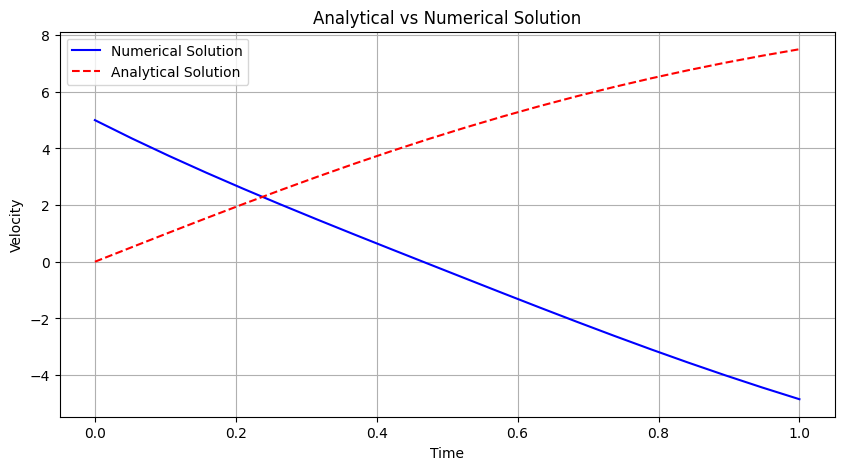

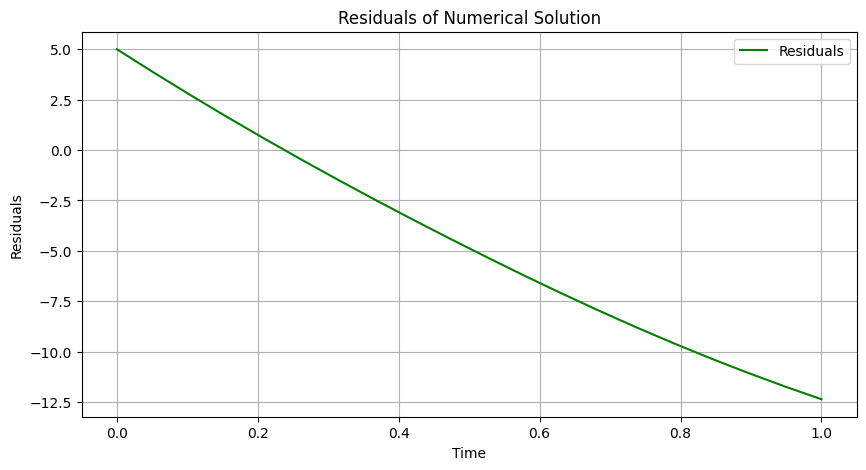

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t0 = 0.0  # starting time
tf = 1.0  # ending time
v0 = 5.0  # starting velocity (positive)
N = 20    # number of steps
m = 1.0   # mass
c = 0.1   # drag coefficient
g = 9.81  # acceleration due to gravity

vT = np.sqrt(m * g / c)

# Time array
time = np.linspace(t0, tf, N)
h = time[1] - time[0]  # Stepsize

# Analytical solution
v_analytical = vT * np.tanh(g * time / vT)

# Initialize numerical solution array
v_numerical = np.zeros_like(time)
v_numerical[0] = v0  # at t=0, let v=v0

# Function to calculate the acceleration at any v
def accel(v):
    # If v is positive (upward motion) drag is negative, and vice versa.
    return -g - np.sign(v) * (c / m) * np.square(v)

# Numerical Integration using Euler's method
for i in range(1, N):
    v_numerical[i] = v_numerical[i - 1] + accel(v_numerical[i - 1]) * h

# Calculate residuals
residuals = v_numerical - v_analytical

# Plot analytical vs numerical solution
plt.figure(figsize=(10, 5))
plt.plot(time, v_numerical, 'b-', label='Numerical Solution')
plt.plot(time, v_analytical, 'r--', label='Analytical Solution')
plt.title('Analytical vs Numerical Solution')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(time, residuals, 'g-', label='Residuals')
plt.title('Residuals of Numerical Solution')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


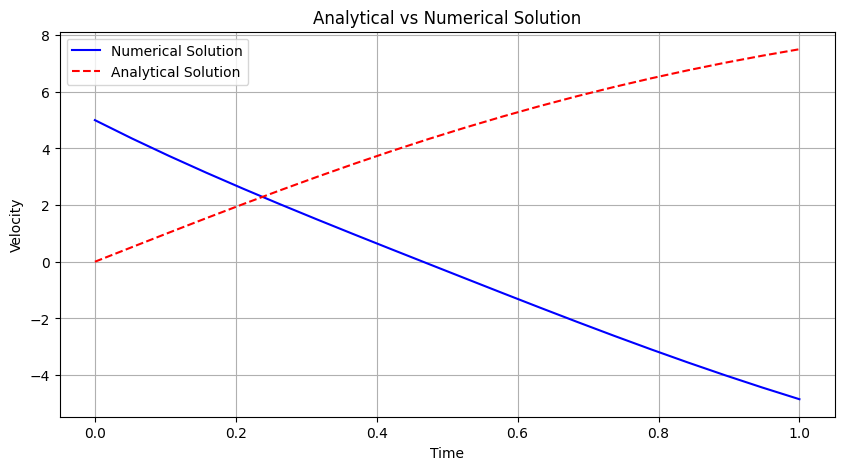

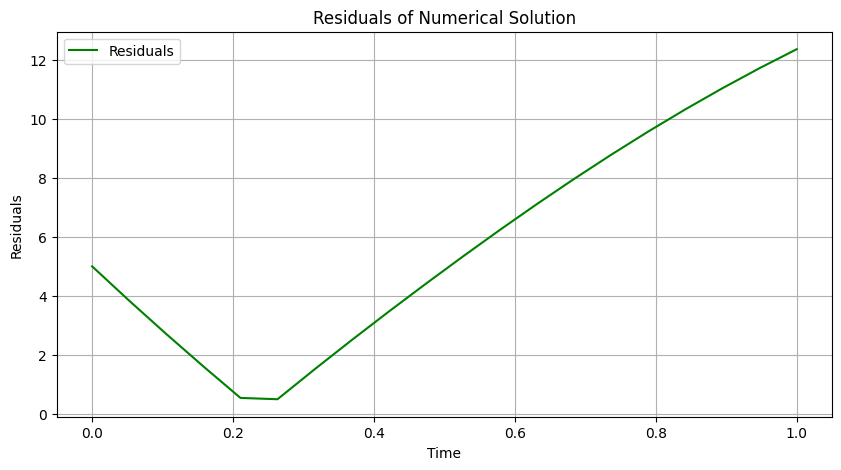

In [ ]:
# in account of these notes: The residuals are the difference between the numerical integration and the "right" answer (which we can find in this case, the analytical solution).

Use caution! When we switch between the upward-moving domain and the downward-moving domain, some weird things can happen with residuals.
import numpy as np
import matplotlib.pyplot as plt

# Constants
t0 = 0.0  # starting time
tf = 1.0  # ending time
v0 = 5.0  # starting velocity (positive)
N = 20    # number of steps
m = 1.0   # mass
c = 0.1   # drag coefficient
g = 9.81  # acceleration due to gravity

vT = np.sqrt(m * g / c)

# Time array
time = np.linspace(t0, tf, N)
h = time[1] - time[0]  # Stepsize

# Analytical solution
v_analytical = vT * np.tanh(g * time / vT)

# Initialize numerical solution array
v_numerical = np.zeros_like(time)
v_numerical[0] = v0  # at t=0, let v=v0

# Function to calculate the acceleration at any v
def accel(v):
    # If v is positive (upward motion) drag is negative, and vice versa.
    return -g - np.sign(v) * (c / m) * np.square(v)

# Numerical Integration using Euler's method
for i in range(1, N):
    v_numerical[i] = v_numerical[i - 1] + accel(v_numerical[i - 1]) * h

# Calculate residuals
residuals = np.abs(v_numerical - v_analytical)

# Plot analytical vs numerical solution
plt.figure(figsize=(10, 5))
plt.plot(time, v_numerical, 'b-', label='Numerical Solution')
plt.plot(time, v_analytical, 'r--', label='Analytical Solution')
plt.title('Analytical vs Numerical Solution')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(time, residuals, 'g-', label='Residuals')
plt.title('Residuals of Numerical Solution')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()
